# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

2.5.0+cu121


'cpu'

## 1. What are 3 areas in industry where computer vision is currently being used?

In [3]:
"""
1. self-driving cars
2. health care
3. security
"""

'\n1. self-driving cars\n2. health care\n3. security\n'

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [4]:
# when the model learn the patterns of the training data so well, it could not generalize well with testing data

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [5]:
"""
1. use more training data:
  when using more data, the model would be able to learn most important feauters and not get stuck on unimportant featuers due to small set

2. use simpler model (less layers or hidden units):
  when the model is more complex for its training dataset, then it would learn uneeded feaures, so using simpler could fix it,
  on the other hand underfitting can be solved by using more complex models

3. data augmentation:
  if we could not get more data, just create more of what you have, transform the data, in image classification you could create more data by
  creating copies of the image's rotations
"""

"\n1. use more training data:\n  when using more data, the model would be able to learn most important feauters and not get stuck on unimportant featuers due to small set\n\n2. use simpler model (less layers or hidden units):\n  when the model is more complex for its training dataset, then it would learn uneeded feaures, so using simpler could fix it,\n  on the other hand underfitting can be solved by using more complex models\n\n3. data augmentation:\n  if we could not get more data, just create more of what you have, transform the data, in image classification you could create more data by\n  creating copies of the image's rotations\n"

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [6]:
from torch import nn

#to get the data and trasform it to tensors
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

In [7]:
#training data
train_data = datasets.MNIST(
    root = 'data', #file location to store data into
    train = True, #because it's used for training
    download=True, #to get it locally
    transform=ToTensor(), #transform it to tensors for futher manupliation
    target_transform=None #label trasformation
)

#testing data
test_data = datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor(),
    download=True,
)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 11.6MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 341kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.21MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.37MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [8]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [9]:
image.shape

torch.Size([1, 28, 28])

In [10]:
import matplotlib.pyplot as plt

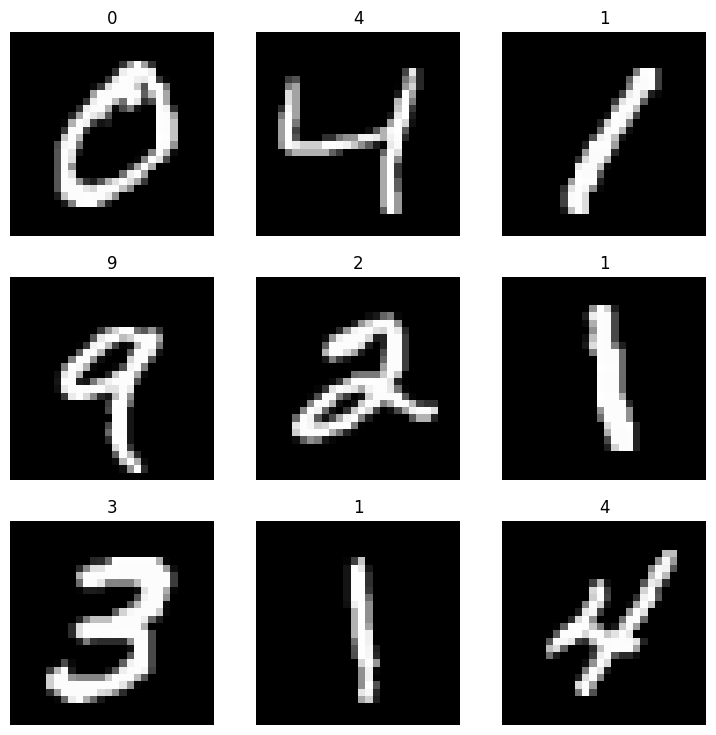

In [11]:
fig = plt.figure(figsize=(9,9))
rows ,cols = 3, 3

for i in range (1, rows* cols +1):
  img, label = train_data[i]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap= 'gray')
  plt.title(label)
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [12]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

#turn datasets into dataloaders
train_dataloader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

print(f"length of train_dataloader: {len(train_dataloader)}")
print(f"length of test_dataloader: {len(test_dataloader)}")

length of train_dataloader: 1875
length of test_dataloader: 313


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [13]:
class MNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(
            in_channels=input_shape,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1,
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1,
        ),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size=2,
            stride=2,
        )
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1,
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1,
        ),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size=2,
            stride=2,
        )
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(
            in_features=hidden_units*7*7, #28 is halved by 2 after fist maxpooling -> 14, second pooling -> 7
            out_features=output_shape
            )
    )

  def forward(self, x: torch.Tensor):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.classifier(x)
    return x

In [14]:
image.shape

torch.Size([1, 28, 28])

In [15]:
model_0 = MNISTModelV0(input_shape=1,hidden_units=10,output_shape=10)
model_0

MNISTModelV0(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [16]:
#loss fun
loss_fn = nn.CrossEntropyLoss() #since it's a multi class classification

#optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [17]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [18]:
epochs = 3

start_train_time_cpu = timer()

for epoch in range(epochs):
  #train loop
  train_loss = 0

  for batch, (X, y) in enumerate(train_dataloader):

    #batch training loop
    model_0.train()

    #1.forward pass
    y_pred = model_0(X)

    #2.calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss

    #3.zero grad
    optimizer.zero_grad()

    #4.loss backward
    loss.backward()

    #5.step
    optimizer.step()

    if(batch % 100 == 0):
      print(f"looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss /= len(train_dataloader)

  #test loop
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    #batch test loop
    for batch, (X, y) in enumerate(test_dataloader):
      #1. forwared pass
      test_pred = model_0(X)

      #2. calculate losss
      test_loss = loss_fn(test_pred, y)

    test_loss /= len(test_dataloader)
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}")

end_train_time_cpu = timer()
totol_train_time_cpu = print_train_time(start=start_train_time_cpu,end= end_train_time_cpu,device=str(next(model_0.parameters()).device))


looked at 0/60000 samples
looked at 3200/60000 samples
looked at 6400/60000 samples
looked at 9600/60000 samples
looked at 12800/60000 samples
looked at 16000/60000 samples
looked at 19200/60000 samples
looked at 22400/60000 samples
looked at 25600/60000 samples
looked at 28800/60000 samples
looked at 32000/60000 samples
looked at 35200/60000 samples
looked at 38400/60000 samples
looked at 41600/60000 samples
looked at 44800/60000 samples
looked at 48000/60000 samples
looked at 51200/60000 samples
looked at 54400/60000 samples
looked at 57600/60000 samples

Train loss: 0.30259 | Test loss: 0.00024
looked at 0/60000 samples
looked at 3200/60000 samples
looked at 6400/60000 samples
looked at 9600/60000 samples
looked at 12800/60000 samples
looked at 16000/60000 samples
looked at 19200/60000 samples
looked at 22400/60000 samples
looked at 25600/60000 samples
looked at 28800/60000 samples
looked at 32000/60000 samples
looked at 35200/60000 samples
looked at 38400/60000 samples
looked at 41

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [19]:
for batch, (X, y) in enumerate(train_dataloader):

    #batch training loop
    model_0.train()

    #1.forward pass
    y_pred = model_0(X)
    print(X.shape)
    print(y_pred.shape)
    break

torch.Size([32, 1, 28, 28])
torch.Size([32, 10])


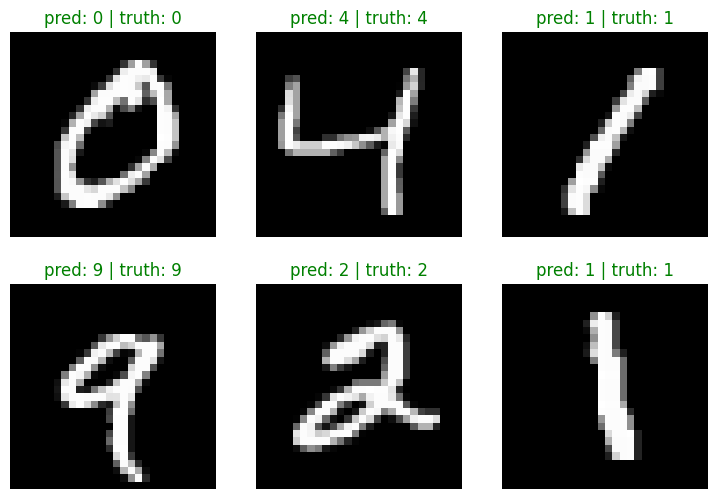

In [20]:
fig = plt.figure(figsize=(9,6))
rows, cols = 2, 3

for i in range(1, rows*cols+1):
  test_img, test_label = train_data[i]

  pred_logit = model_0(test_img.unsqueeze(dim=0))
  pred_label = torch.softmax(pred_logit.squeeze(),dim=0).argmax(dim=0)

  fig.add_subplot(rows, cols, i)

  plt.imshow(test_img.squeeze(), cmap='gray')
  title = f"pred: {pred_label} | truth: {test_label}"
  if pred_label == test_label:
    plt.title(title, c='g')
  else:
    plt.title(title, c='r')

  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [21]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

In [22]:
#1. make predictions with model_0

y_preds = []
model_0.eval()

with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="making predicions"):
    # X, y = X.to(device), y.to(device)
    y_logits = model_0(X)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)

making predicions:   0%|          | 0/313 [00:00<?, ?it/s]

In [23]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 30.7 MB/s eta 0:00:00
mlxtend version: 0.23.1


In [24]:
print(mlxtend.__version__)

0.23.1


In [25]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [26]:
#2. make the confusion matrix
confmat = ConfusionMatrix(num_classes=10, task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor, target = test_data.targets)

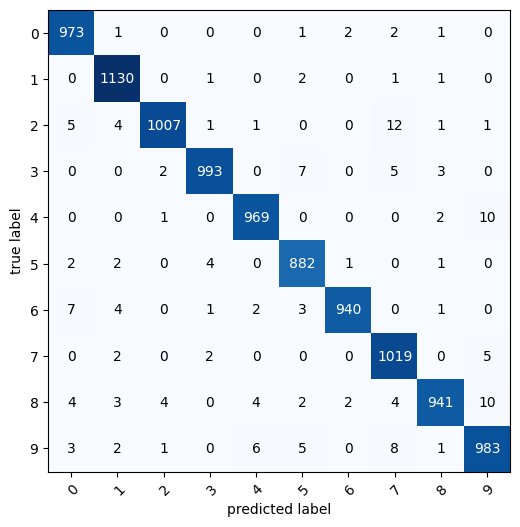

In [27]:
#3. plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    figsize=(10,6),
    class_names = [0,1,2,3,4,5,6,7,8,9]
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [28]:
random_tensor = torch.randn(size=(1,3,64,64))

conv_layer = nn.Conv2d(
    in_channels=3,
    out_channels=1,
    kernel_size=3, # 1=[1,1,64,64] | 2=[1,1,63,63] | 3=[1,1,62,62]
    stride=1,
    padding=0
)

conv_layer(random_tensor).shape

torch.Size([1, 1, 62, 62])

- kernel_size change the image shape with (image size - kernal + 1)
- if image shape [64,64], kernel size = 3 -> 64-(3+1) = 62

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [29]:
#1. get fashion-mnist
fashion_train_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

fashion_test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    transform=ToTensor(),
    download=True,
)

100%|██████████| 26.4M/26.4M [00:00<00:00, 115MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 10.0MB/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




100%|██████████| 4.42M/4.42M [00:00<00:00, 60.6MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 17.4MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [30]:
img, label = fashion_train_data[0]
img, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [31]:
img.shape

torch.Size([1, 28, 28])

In [32]:
len(fashion_train_data), len(fashion_test_data)

(60000, 10000)

In [33]:
class_names = fashion_train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

(<matplotlib.image.AxesImage at 0x79995814ec80>, 'Ankle boot')

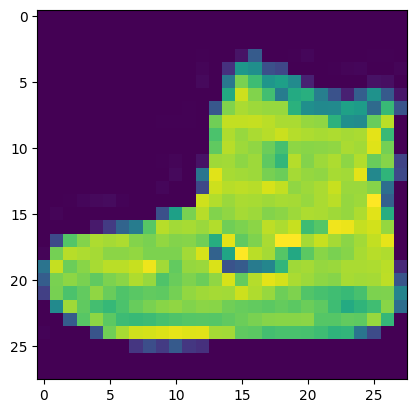

In [34]:
plt.imshow(img.squeeze()), class_names[label]

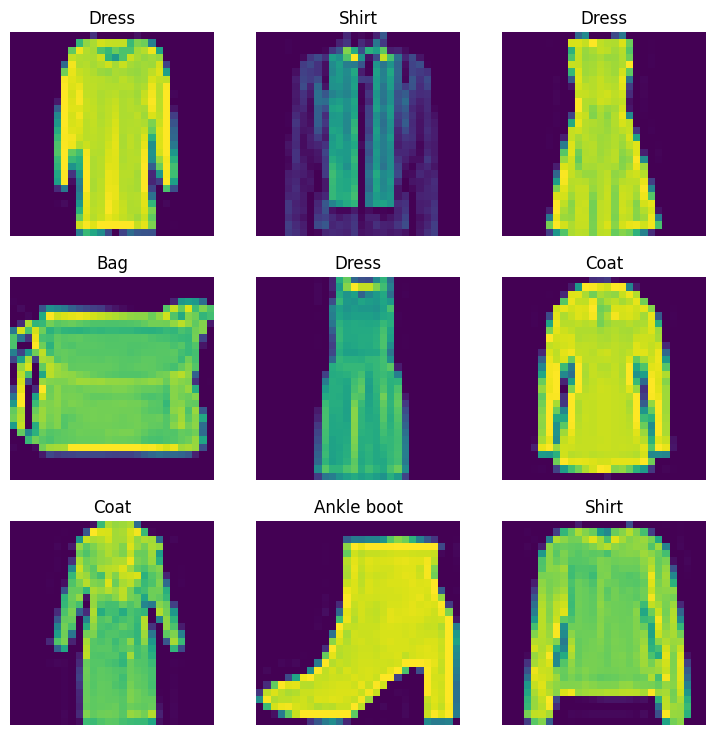

In [35]:
#see more sample in fashion MNIST
rows, cols = 3, 3
fig = plt.figure(figsize=(9,9))

for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(fashion_train_data),size=[1]).item()
  x,y = fashion_train_data[random_idx]
  fig.add_subplot(rows,cols, i)
  plt.axis(False)
  plt.title(class_names[y])
  plt.imshow(x.squeeze())

In [36]:
#2. turn dataset into data loader
BATCH_SIZE = 32

fashion_train_dataloader = DataLoader(
    fashion_train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

fashion_test_dataloader = DataLoader(
    fashion_test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [37]:
fashion_test_data[0][0].shape, len(class_names)

(torch.Size([1, 28, 28]), 10)

In [38]:
#2. use MNISTModelV0 to create fashion model
fashion_model = MNISTModelV0(
    input_shape=1,
    hidden_units=10,
    output_shape=10
)
fashion_model

MNISTModelV0(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [39]:
#3. train model
#using same loss and optimizer functions

epochs = 3

start_train_time_cpu = timer()

for epoch in range(epochs):
  #train loop
  train_loss = 0

  for batch, (X, y) in enumerate(fashion_train_dataloader):

    #batch training loop
    fashion_model.train()

    #1.forward pass
    y_pred = fashion_model(X)

    #2.calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss

    #3.zero grad
    optimizer.zero_grad()

    #4.loss backward
    loss.backward()

    #5.step
    optimizer.step()

    if(batch % 500 == 0):
      print(f"looked at {batch*len(X)}/{len(fashion_train_dataloader.dataset)} samples")

  train_loss /= len(fashion_train_dataloader)

  #test loop
  test_loss, test_acc = 0, 0
  fashion_model.eval()
  with torch.inference_mode():
    #batch test loop
    for batch, (X, y) in enumerate(fashion_test_dataloader):
      #1. forwared pass
      test_pred = fashion_model(X)

      #2. calculate losss
      test_loss = loss_fn(test_pred, y)

    test_loss /= len(fashion_test_dataloader)
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}")

end_train_time_cpu = timer()
totol_train_time_cpu = print_train_time(start=start_train_time_cpu,end= end_train_time_cpu,device=str(next(fashion_model.parameters()).device))


looked at 0/60000 samples
looked at 16000/60000 samples
looked at 32000/60000 samples
looked at 48000/60000 samples

Train loss: 2.30518 | Test loss: 0.00735
looked at 0/60000 samples
looked at 16000/60000 samples
looked at 32000/60000 samples
looked at 48000/60000 samples

Train loss: 2.30519 | Test loss: 0.00735
looked at 0/60000 samples
looked at 16000/60000 samples
looked at 32000/60000 samples
looked at 48000/60000 samples

Train loss: 2.30519 | Test loss: 0.00735
Train time on cpu: 190.070 seconds


In [40]:
#4. make predictions
y_preds = []
fashion_model.eval()

with torch.inference_mode():
  for X, y in tqdm(fashion_test_dataloader, desc="making predicions"):
    y_logits = fashion_model(X)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)

making predicions:   0%|          | 0/313 [00:00<?, ?it/s]

In [86]:
# Get wrong prediction indexes
import numpy as np
wrong_pred_indexes = np.where(y_pred_tensor != fashion_test_data.targets)[0]
len(wrong_pred_indexes)

8159

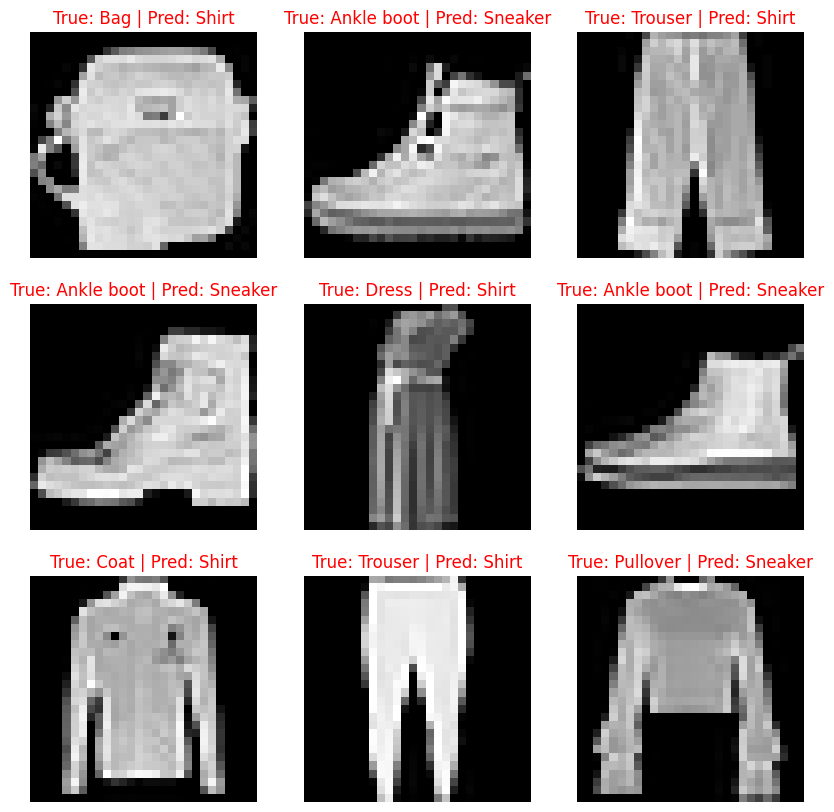

In [87]:
# Select random 9 wrong predictions and plot them
import random
random_selection = random.sample(list(wrong_pred_indexes), k=9)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_selection):
  # Get true and pred labels
  true_label = class_names[fashion_test_data[idx][1]]
  pred_label = class_names[y_pred_tensor[idx]]

  # Plot the wrong prediction with its original label
  plt.subplot(3, 3, i+1)
  plt.imshow(fashion_test_data[idx][0].squeeze(), cmap="gray")
  plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
  plt.axis(False);